<a href="https://colab.research.google.com/github/laurasg03/Parcial_1_SyS/blob/main/Parcial_1_sys_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
%matplotlib inline
import sympy as sym
sym.init_printing() #se inicializa para mostrar en pantalla

tv = sym.symbols('t', real=True)#se declara la variable simbólica t
xv = 7*sym.sin(4*t - 0.5*sym.pi) - 2*sym.cos(5*t) + 2*sym.cos(10*t)#señal a simular
xv

7⋅sin(4⋅t - 0.5⋅π) - 2⋅cos(5⋅t) + 2⋅cos(10⋅t)

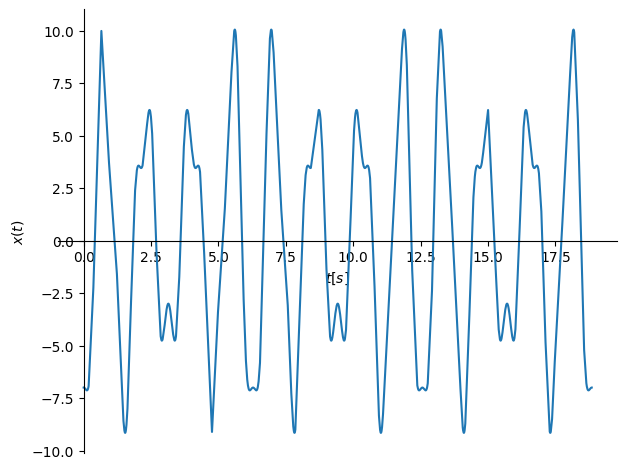

In [27]:
T = 2*sym.pi #periodo de la señal cuasi-perdiódica
sym.plot(x,(t,0,3*T),xlabel=r'$t [s]$',ylabel=r'$x(t)$')

In [ ]:
def my_ceropen(x,ymin = -5, ymax = 5): #en general se pueden definir valores por defecto
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv
yv = my_ceropen(xv,ymin=-5,ymax=5)
plt.stem(tv, yv, linefmt=lc, markerfmt=mc, use_line_collection=True)
plt.show()

In [19]:
from scipy.spatial.distance  import cdist
nbits=3
ymin=-5
ymax=5
ne=2**nbits
vq=np.linspace(ymin,ymax,ne)#Vector cuantizacion
vq=vq.reshape(-1,1)
d=cdist(yv.reshape(-1,1),vq)#se utiliza reshape(-1,1) para generar vectores columna como lo pide cdist
d.shape

(40, 8)

In [20]:
ind = np.argmin(d,axis=1) #el parámetro axis = 1 indica que busca la posición a lo largo de las columnas del elemento más pequeño en cada fila
ind

array([7, 7, 7, 7, 6, 6, 6, 5, 5, 4, 4, 3, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 2, 2, 3, 3, 4, 5, 5, 6, 6, 6, 7, 7, 7])

In [21]:
def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados

  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]

In [22]:
for i in range(yv.shape[0]):
   if i==0: #primera muestra
     yq = my_cuantizador(yv[i],vq)
   else:
     yq = np.append(yq,my_cuantizador(yv[i],vq)) #apilar datos cuantizando si i>0